<a href="https://colab.research.google.com/github/himanshu-tawra/COVID-19-Detector-Flask-App-from-Chest-X-ray-Images-with-Keras-and-Deep-Learning/blob/master/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import os
from keras import applications
import keras

In [59]:
IMAGE_SIZE = [224,224]

In [60]:
xception = applications.Xception(input_shape= IMAGE_SIZE + [3] , weights='imagenet',include_top=False)

In [61]:
for layer in xception.layers:
  layer.trainable = False

In [62]:
xception_output = xception.output

In [64]:
flatten = Flatten()(xception_output)
Dense_layer1 = Dense(units = 256,activation=keras.layers.LeakyReLU(alpha=0.3))(flatten)
Dense_layer2 = Dense(units=128,activation=keras.layers.LeakyReLU(alpha=0.3))(Dense_layer1)
Dense_layer3 = Dense(units = 64,activation=keras.layers.LeakyReLU(alpha=0.3))(Dense_layer2)
output_layer = Dense(3,activation='softmax')(Dense_layer3)

In [65]:
model = Model(inputs = xception.input,outputs = output_layer)

In [66]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [67]:
model.compile(
    optimizer=keras.optimizers.Adam(0.000001),  # Low learning rate
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [68]:
training_data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [69]:
val_data_gen = ImageDataGenerator(
    rescale = 1./255.
)

In [70]:
training_set = training_data_gen.flow_from_directory(
    '/content/drive/My Drive/Data/train/',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = 32
)

Found 1380 images belonging to 3 classes.


In [71]:
val_set = val_data_gen.flow_from_directory(
    '/content/drive/My Drive/Data/test/',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = 32
)

Found 353 images belonging to 3 classes.


In [72]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
callback_list = [ModelCheckpoint('xception_new.h5', monitor='val_loss', verbose=True, save_best_only=True)]

In [73]:
r = model.fit(
    training_set,
    epochs = 100,
    validation_data = val_set,
    validation_steps = len(val_set),
    steps_per_epoch = len(training_set)
)

Epoch 1/100
44/44 [==============================] - 70s 2s/step - loss: 0.8325 - accuracy: 0.6645 - val_loss: 0.5239 - val_accuracy: 0.8924
Epoch 2/100
44/44 [==============================] - 68s 2s/step - loss: 0.4703 - accuracy: 0.8543 - val_loss: 0.3372 - val_accuracy: 0.9037
Epoch 3/100
44/44 [==============================] - 67s 2s/step - loss: 0.3510 - accuracy: 0.8739 - val_loss: 0.2818 - val_accuracy: 0.9065
Epoch 4/100
44/44 [==============================] - 68s 2s/step - loss: 0.3014 - accuracy: 0.8942 - val_loss: 0.2769 - val_accuracy: 0.8895
Epoch 5/100
44/44 [==============================] - 68s 2s/step - loss: 0.2573 - accuracy: 0.9116 - val_loss: 0.2335 - val_accuracy: 0.9122
Epoch 6/100
44/44 [==============================] - 67s 2s/step - loss: 0.2400 - accuracy: 0.9123 - val_loss: 0.2185 - val_accuracy: 0.9122
Epoch 7/100
44/44 [==============================] - 68s 2s/step - loss: 0.2295 - accuracy: 0.9196 - val_loss: 0.2279 - val_accuracy: 0.9150
Epoch 8/100
4

In [74]:
test_pred = []
test_actual = []
train_pred = []
train_actual = []
label_dict = {
    0 : "Covid",
    1 : "Normal",
    2 : "Pneumonia"
}
train_covid_path = '/content/drive/My Drive/Data/train/COVID19'
train_normal_path = '/content/drive/My Drive/Data/train/NORMAL'
train_pneumonia_path = '/content/drive/My Drive/Data/train/PNEUMONIA'


covid_path = '/content/drive/My Drive/Data/test/COVID19'
normal_path = '/content/drive/My Drive/Data/test/NORMAL'
pneumonia_path = '/content/drive/My Drive/Data/test/PNEUMONIA'

In [109]:
model.evaluate_generator(training_set,steps = 32,verbose = 1)

32/32 [==============================] - 43s 1s/step - loss: 0.0424 - accuracy: 0.9863


[0.042353346943855286, 0.986328125]

In [110]:
model.evaluate_generator(val_set,steps = 32, verbose = 1)

12/32 [==========>...................] - 11s 905ms/step - loss: 0.1405 - accuracy: 0.9462


[0.14045575261116028, 0.9461756348609924]

In [ ]:
predict_image(train_covid_path)
predict_image(train_normal_path)
predict_image(train_pneumonia_path)

predict_image(covid_path)
predict_image(normal_path)
predict_image(pneumonia_path)

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
testing_confusion_mat = confusion_matrix(test_actual,test_pred)

print(testing_confusion_mat)

[[115   0   1]
 [  0 112   4]
 [  0  14 107]]


In [98]:
def plot_confusion_matrix(confusion_mat,fig_name):

  classes = ['COVID','NORMAL','PNEUMONIA']
  tick_marks = [0.5,1.5,2.5]
  sns.heatmap(confusion_mat,cmap='plasma',annot=True,linewidth = 2)

  plt.xticks(tick_marks, classes,rotation ='vertical')
  plt.yticks(tick_marks, classes,rotation ='vertical')
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig(fig_name + '.png')
  plt.margins(0.2) 

  plt.show()

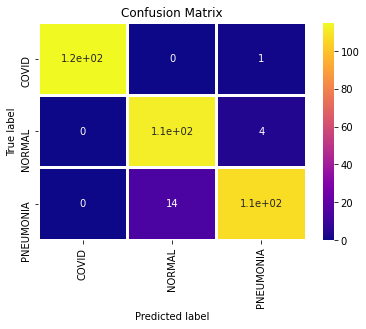

In [99]:
#plot_confusion_matrix(training_confusion_matrix,'Training_Confusion_Matrix')
plot_confusion_matrix(testing_confusion_mat,'Testing_Confusion_Matrix')

In [100]:
from sklearn.metrics import classification_report
print(classification_report(train_actual, train_pred))
print(classification_report(test_actual, test_pred))


              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00       460
      Normal       0.93      1.00      0.97       460
   PNEUMONIA       0.00      0.00      0.00       460
   Pneumonia       0.00      0.00      0.00         0

    accuracy                           0.67      1380
   macro avg       0.48      0.50      0.49      1380
weighted avg       0.64      0.67      0.65      1380

              precision    recall  f1-score   support

       Covid       1.00      0.99      1.00       116
      Normal       0.89      0.97      0.93       116
   Pneumonia       0.96      0.88      0.92       121

    accuracy                           0.95       353
   macro avg       0.95      0.95      0.95       353
weighted avg       0.95      0.95      0.95       353



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


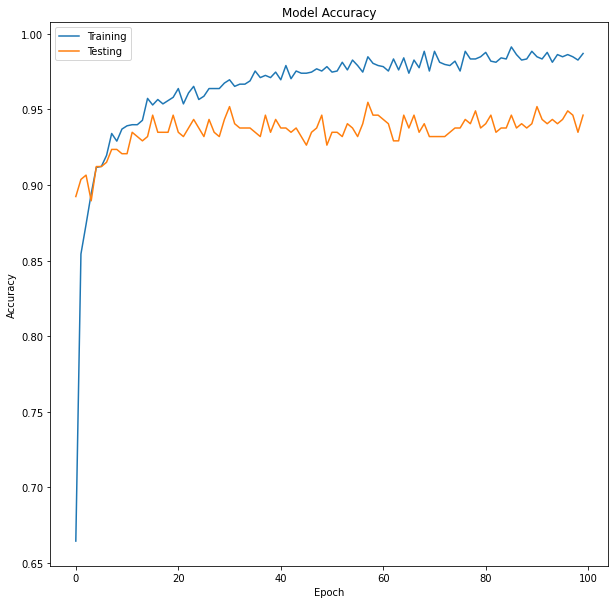

In [101]:

plt.figure(figsize=(10,10))

plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_chest_accuracy.png')
plt.show()

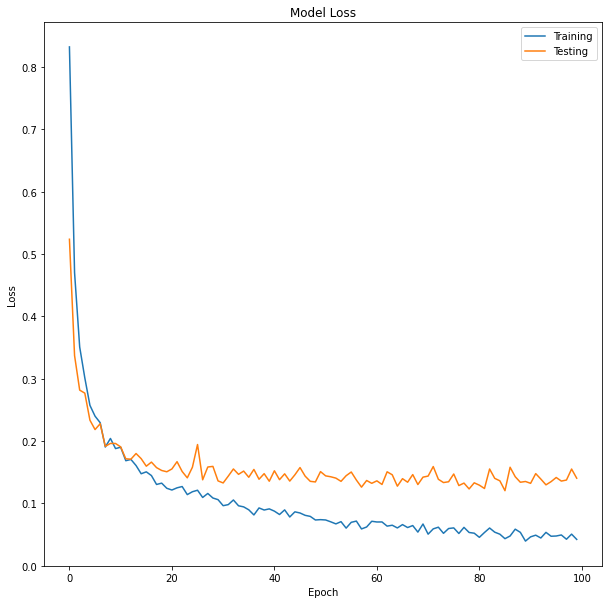

In [102]:
plt.figure(figsize=(10,10))

plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_chest_loss.png')
plt.show()

In [103]:
from keras.utils import plot_model

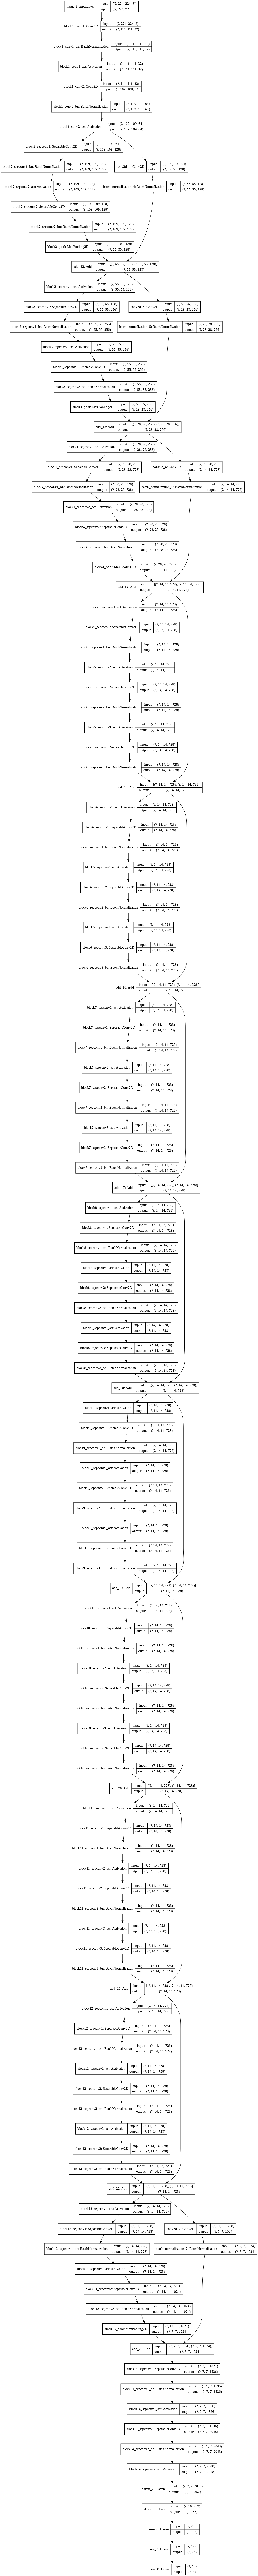

In [104]:
plot_model(model, show_shapes=True, to_file='model__xception.png')


In [105]:
print(np.array(test_actual).shape)

(353,)


In [106]:
print(train_pred)

['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 

In [107]:
model.save('final_xception_model.h5')